In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [3]:
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.titlesize'] = 30
plt.rcParams["font.family"] = "NanumGothic"


# 데이터 불러오기
- train 데이터 구조 : (3000,24)
- test 데이터 구조 : (2000,23)

In [48]:
import pandas as pd

train = pd.read_csv("./train.csv")
train = train.drop(columns = ["id"], axis = 1)


test = pd.read_csv("./test.csv")
test = test.drop(columns = ["id"], axis = 1)

submission = pd.read_csv("./sample_submission.csv")

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(train.shape)
train.head()

train set은 23 개의 feature를 가진 3000 개의 데이터 샘플로 이루어져 있습니다.
(3000, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [49]:
print(f'test set은 {test.shape[1]} 개의 feature를 가진 {test.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
print(test.shape)
test.head()

test set은 22 개의 feature를 가진 2000 개의 데이터 샘플로 이루어져 있습니다.
(2000, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,...,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,...,4,4,3,1,2,5,4,4,0,0.0


# 결측치 확인

- train, test 데이터 모두 결측치는 없음

In [50]:
#결측치 있는지 확인하는 함수

def check_missing_col(dataframe):
    
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.\n')
            missing_col.append([col, dataframe[col].dtype])
    print(f'결측치가 있는 컬럼 의 개수는 {counted_missing_col} 입니다')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

    return missing_col




In [51]:
missing_col = check_missing_col(train)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


In [52]:
missing_col = check_missing_col(test)
print(missing_col)

결측치가 있는 컬럼 의 개수는 0 입니다
결측치가 존재하지 않습니다
[]


# 데이터 전처리

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [54]:
numeric_features = train.columns[(train.dtypes == "float64") | (train.dtypes == "int64")]

categorical_features = train.columns[(train.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("\n")
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target']


범주형 데이터는 다음과 같습니다. 
  ['Gender', 'Customer Type', 'Type of Travel', 'Class']


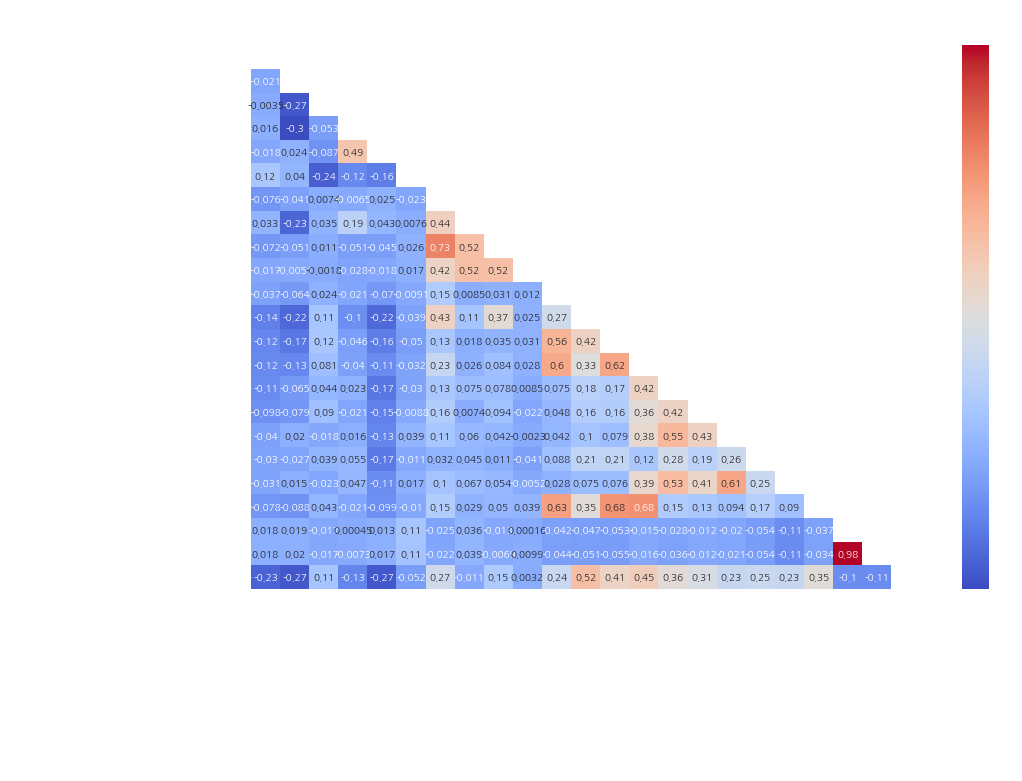

In [55]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [56]:
abs(corr_df.corr()["target"]).sort_values(ascending = False)

target                               1.000000
Inflight entertainment               0.522935
Ease of Online booking               0.447784
Online support                       0.411944
On-board service                     0.359699
Online boarding                      0.351370
Leg room service                     0.311086
Customer Type                        0.271471
Seat comfort                         0.271270
Class                                0.267565
Checkin service                      0.248975
Inflight wifi service                0.242427
Cleanliness                          0.234848
Gender                               0.233619
Baggage handling                     0.232302
Food and drink                       0.145126
Type of Travel                       0.133565
Arrival Delay in Minutes             0.112338
Age                                  0.107226
Departure Delay in Minutes           0.104975
Flight Distance                      0.052059
Departure/Arrival time convenient 

In [59]:
from sklearn.preprocessing import LabelEncoder

X_train = train.copy()
X_train = X_train.drop(columns=["target"], axis = 1)
X_train[X_train.columns[X_train.dtypes=='O']] = X_train[X_train.columns[X_train.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

y_train = train.target


X_test = test.copy()
X_test[X_test.columns[X_test.dtypes=='O']] = X_test[X_test.columns[X_test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)


In [60]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)


X_train = ss.transform(X_train)
X_test = ss.transform(X_test)



# 모델링

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [62]:
lr = LogisticRegression()


In [64]:
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [68]:
submission["target"] = prediction
submission.to_csv("first.csv",index = False)